# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [27]:
# Load dataset
file_path = "https://raw.githubusercontent.com/SoraIroShiro/submission_basic_ML/refs/heads/main/bank_transactions_data_2.csv"
df = pd.read_csv(file_path)

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [28]:
# Exploratory Data Analysis (EDA)
# mengecek isi data
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14  AccountBalance          

In [6]:
# Menentukan kolom numerik dan kategorikal
numerical_columns = df.select_dtypes(exclude=['object']).columns.tolist()
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

# Menghapus kolom identifikasi dari daftar kategorikal
excluded_columns = ['TransactionID', 'AccountID', 'DeviceID', 'IP Address', 'MerchantID', 'PreviousTransactionDate', 'TransactionDate']
categorical_columns = [col for col in categorical_columns if col not in excluded_columns]

numerical_columns, categorical_columns

(['TransactionAmount',
  'CustomerAge',
  'TransactionDuration',
  'LoginAttempts',
  'AccountBalance'],
 ['TransactionType', 'Location', 'Channel', 'CustomerOccupation'])

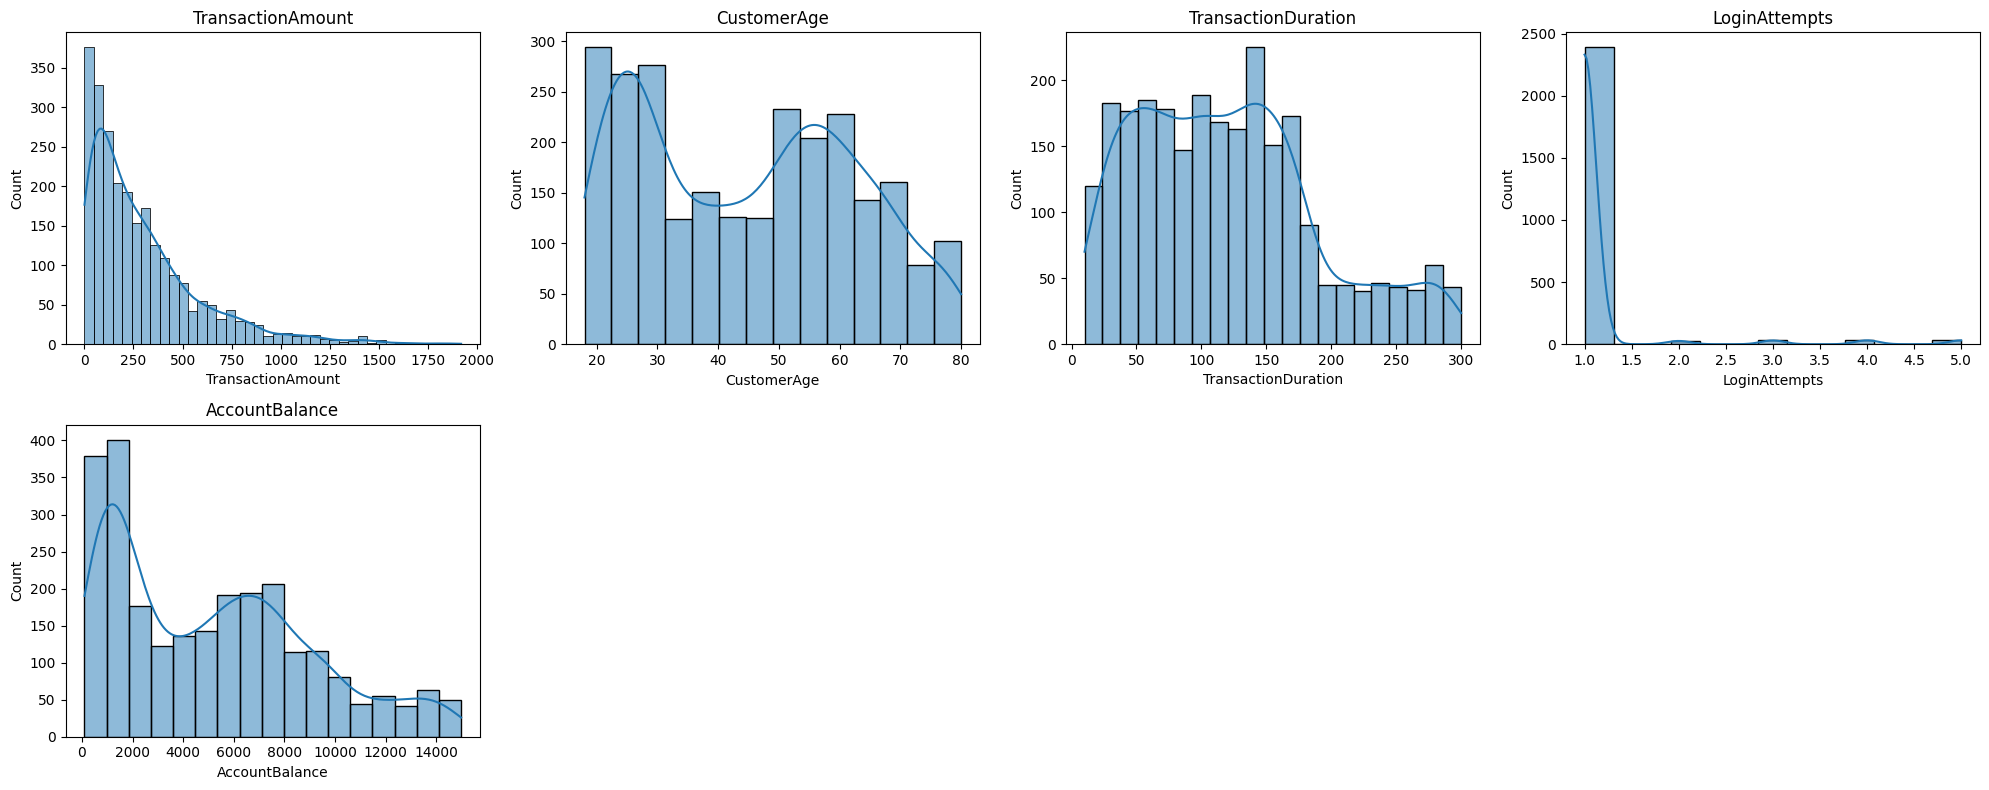

In [7]:
# Menentukan jumlah kolom dan baris
num_cols = len(numerical_columns)
cols_per_row = 4
rows = -(-num_cols // cols_per_row)  # Ceiling division tanpa np.ceil

# Membuat subplots
fig, axes = plt.subplots(rows, cols_per_row, figsize=(5 * cols_per_row, 4 * rows))
axes = axes.flatten()

# Plot histogram untuk setiap kolom numerik
for idx, column in enumerate(numerical_columns):
    sns.histplot(df[column], kde=True, ax=axes[idx])
    axes[idx].set_title(column)

# Menonaktifkan subplot kosong yang tersisa
for empty_idx in range(idx + 1, len(axes)):
    fig.delaxes(axes[empty_idx])

plt.tight_layout()
plt.show()

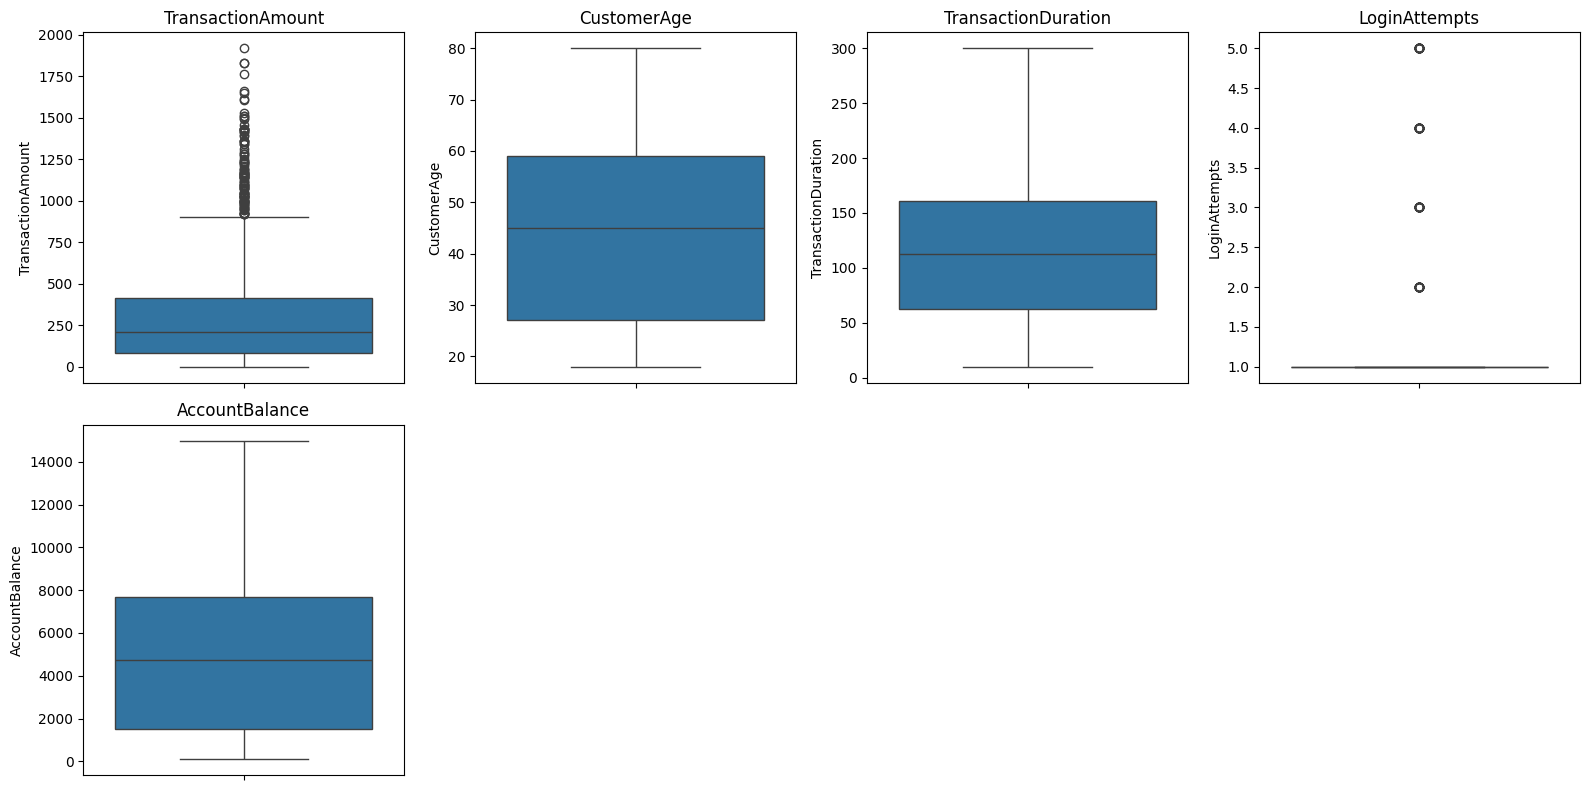

In [8]:
# Menentukan jumlah kolom dan baris untuk tampilan grid (4 kolom per baris)
cols_per_row = 4
rows = -(-len(numerical_columns) // cols_per_row)  # Ceiling division

# Membuat subplots
fig, axes = plt.subplots(rows, cols_per_row, figsize=(4 * cols_per_row, 4 * rows))
axes = axes.flatten()

# Plot boxplot untuk setiap kolom numerik
for idx, column in enumerate(numerical_columns):
    sns.boxplot(y=df[column], ax=axes[idx])
    axes[idx].set_title(column)

# Menonaktifkan subplot kosong yang tidak terpakai
for empty_idx in range(idx + 1, len(axes)):
    fig.delaxes(axes[empty_idx])

plt.tight_layout()
plt.show()

C:\Users\Reina_Chi\AppData\Local\Temp\ipykernel_3804\915037218.py:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax_loc.set_xticklabels(ax_loc.get_xticklabels(), ha='right')


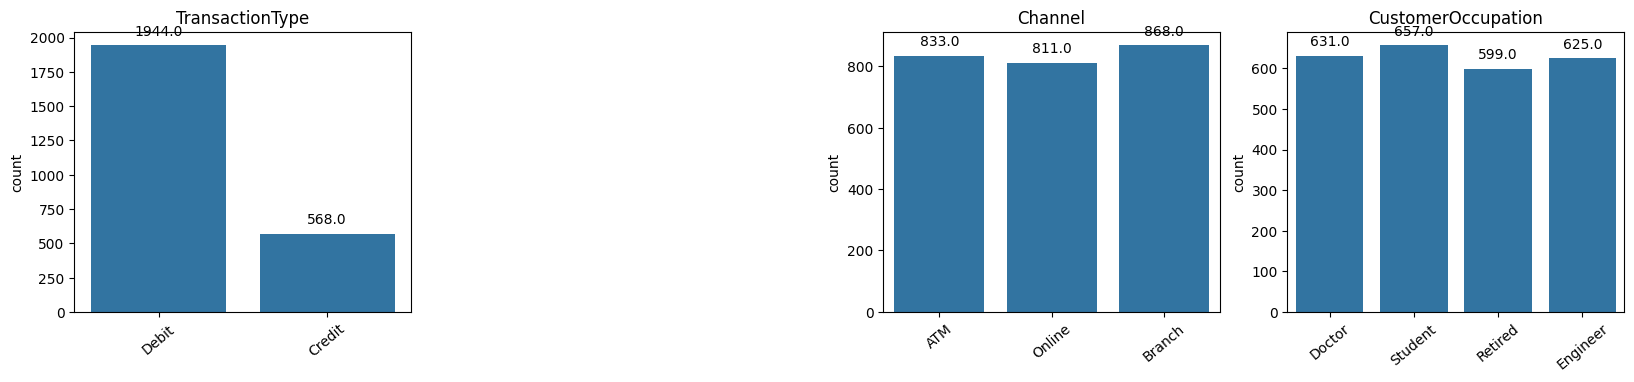

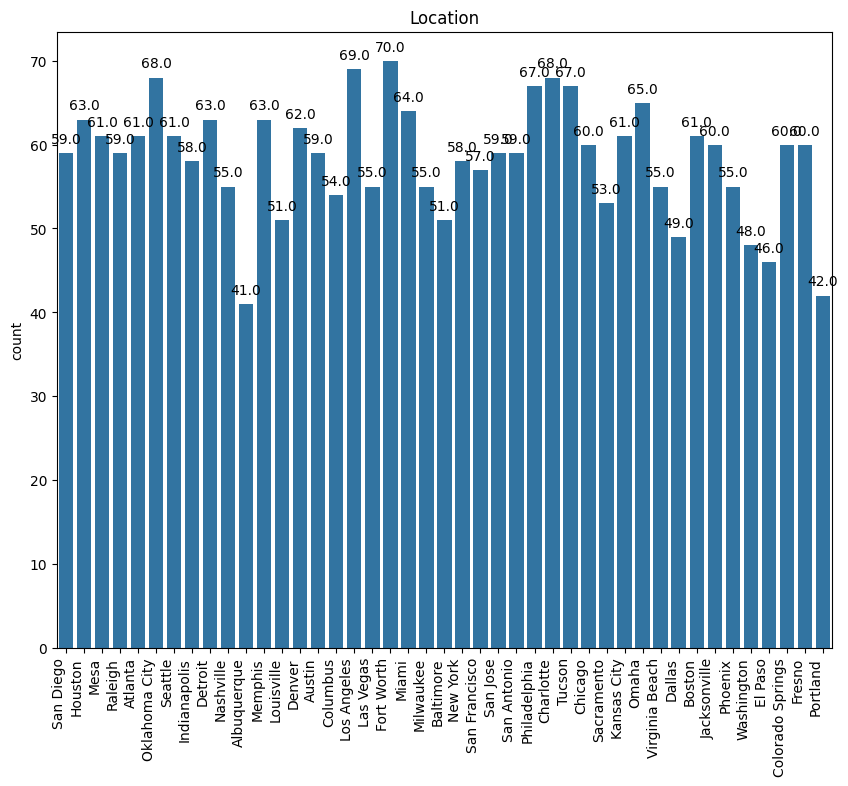

<Figure size 640x480 with 0 Axes>

In [9]:
# Menghitung jumlah baris untuk tampilan grid
additional_row = 1 if "Location" in categorical_columns else 0
rows = -(-len(categorical_columns) // cols_per_row) + additional_row  # Tambah baris ekstra untuk Location

# Membuat subplots dengan ukuran yang lebih luas
fig, axes = plt.subplots(rows, cols_per_row, figsize=(5 * cols_per_row, 4 * rows))
axes = axes.flatten()

location_ax = None  # Untuk menyimpan subplot khusus Location

# Plot countplot untuk setiap kolom kategorikal
for idx, column in enumerate(categorical_columns):
    if column == "Location":
        continue  # Skip Location, akan ditampilkan di subplot besar

    sns.countplot(data=df, x=column, ax=axes[idx])
    axes[idx].tick_params(axis='x', rotation=40)
    axes[idx].set_xlabel('')
    axes[idx].set_title(column)

    # Menambahkan anotasi jumlah data pada setiap kategori
    for p in axes[idx].patches:
        axes[idx].annotate(f'{p.get_height()}', 
                           (p.get_x() + p.get_width() / 2., p.get_height()), 
                           ha='center', va='bottom', 
                           xytext=(0, 5), textcoords='offset points')

# Tambahkan subplot baru untuk Location dengan ukuran lebih besar (2x2 ukuran subplot biasa)
fig_loc, ax_loc = plt.subplots(figsize=(10, 8))
sns.countplot(data=df, x="Location", ax=ax_loc)
ax_loc.tick_params(axis='x', rotation=90)
ax_loc.set_xlabel('')
ax_loc.set_title("Location")
ax_loc.set_xticklabels(ax_loc.get_xticklabels(), ha='right')

# Tambahkan anotasi jumlah data
for p in ax_loc.patches:
    ax_loc.annotate(f'{p.get_height()}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='bottom', 
                    xytext=(0, 5), textcoords='offset points')
    
# Menonaktifkan subplot kosong yang tidak terpakai
for ax in axes:
    if len(ax.patches) == 0:  # Jika subplot tidak memiliki data (tidak ada batang pada countplot)
        fig.delaxes(ax)

plt.show()

plt.tight_layout()
plt.show()

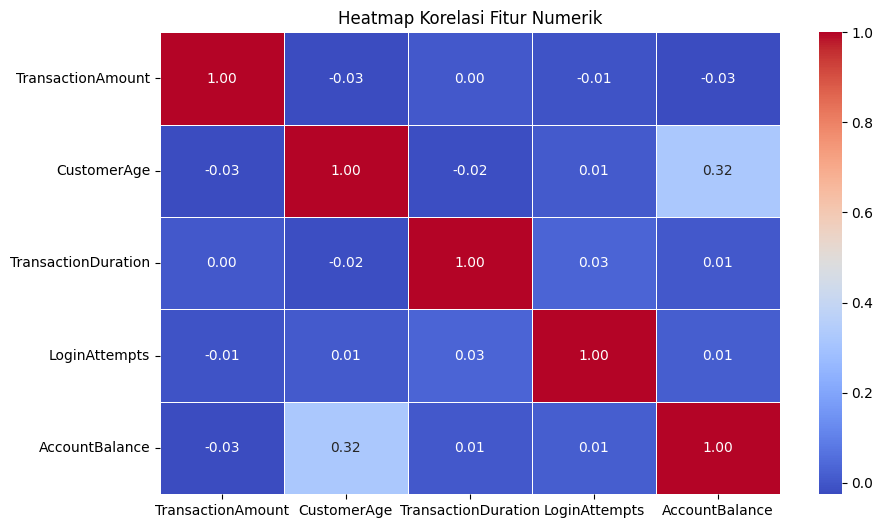

In [10]:
# Membuat heatmap untuk korelasi antara fitur numerik
plt.figure(figsize=(10, 6))
sns.heatmap(df[numerical_columns].corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Heatmap Korelasi Fitur Numerik")
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [11]:
# Menampilkan jumlah kategori unik di setiap kolom kategorikal
for col in categorical_columns:
    unique_count = df[col].nunique()
    print(f'{col} : {unique_count}')

TransactionType : 2
Location : 43
Channel : 3
CustomerOccupation : 4


In [12]:
# Menentukan kolom kategorikal
categorical_columns = ['TransactionType', 'Location', 'Channel', 'CustomerOccupation']

# Label Encoding untuk TransactionType (biner)
le = LabelEncoder()
df['TransactionType'] = le.fit_transform(df['TransactionType'])

# One-Hot Encoding untuk kolom lainnya
df = pd.get_dummies(df, columns=['Location', 'Channel', 'CustomerOccupation'], drop_first=True)

# Menampilkan hasil
print(df.head())

  TransactionID AccountID  TransactionAmount      TransactionDate  \
0      TX000001   AC00128              14.09  2023-04-11 16:29:14   
1      TX000002   AC00455             376.24  2023-06-27 16:44:19   
2      TX000003   AC00019             126.29  2023-07-10 18:16:08   
3      TX000004   AC00070             184.50  2023-05-05 16:32:11   
4      TX000005   AC00411              13.45  2023-10-16 17:51:24   

   TransactionType DeviceID      IP Address MerchantID  CustomerAge  \
0                1  D000380  162.198.218.92       M015           70   
1                1  D000051     13.149.61.4       M052           68   
2                1  D000235  215.97.143.157       M009           19   
3                1  D000187  200.13.225.150       M002           26   
4                0  D000308    65.164.3.100       M091           26   

   TransactionDuration  ...  Location_San Jose  Location_Seattle  \
0                   81  ...              False             False   
1                  141

In [13]:
# Menampilkan jumlah nilai kosong (missing values) di setiap kolom
missing_values = df.isnull().sum()
print(missing_values)

TransactionID                  0
AccountID                      0
TransactionAmount              0
TransactionDate                0
TransactionType                0
DeviceID                       0
IP Address                     0
MerchantID                     0
CustomerAge                    0
TransactionDuration            0
LoginAttempts                  0
AccountBalance                 0
PreviousTransactionDate        0
Location_Atlanta               0
Location_Austin                0
Location_Baltimore             0
Location_Boston                0
Location_Charlotte             0
Location_Chicago               0
Location_Colorado Springs      0
Location_Columbus              0
Location_Dallas                0
Location_Denver                0
Location_Detroit               0
Location_El Paso               0
Location_Fort Worth            0
Location_Fresno                0
Location_Houston               0
Location_Indianapolis          0
Location_Jacksonville          0
Location_K

In [14]:

# Menampilkan hasil
df.describe()

,TransactionAmount,TransactionType,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000
mean,297.593778,0.773885,44.673965,119.643312,1.124602,5114.302966
std,291.946243,0.418398,17.792198,69.963757,0.602662,3900.942499
min,0.260000,0.000000,18.000000,10.000000,1.000000,101.250000
25%,81.885000,1.000000,27.000000,63.000000,1.000000,1504.370000
50%,211.140000,1.000000,45.000000,112.500000,1.000000,4735.510000
75%,414.527500,1.000000,59.000000,161.000000,1.000000,7678.820000
max,1919.110000,1.000000,80.000000,300.000000,5.000000,14977.990000


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

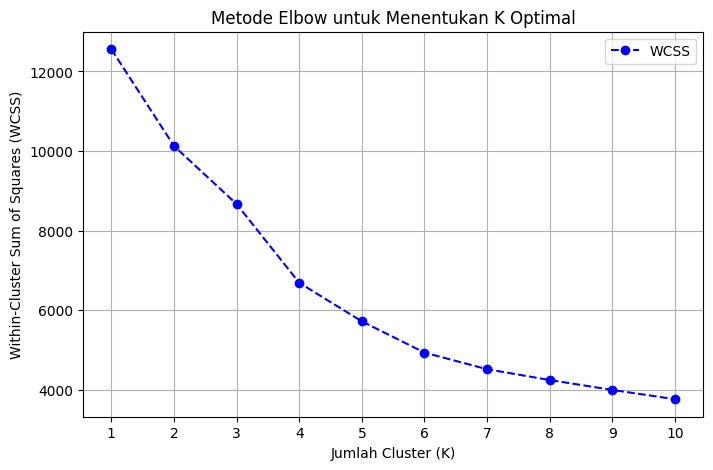

In [15]:
# Normalisasi data sebelum diterapkan ke K-Means
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[numerical_columns])  # Gunakan dataset yang sudah dibersihkan

# Menghitung Within-Cluster Sum of Squares (WCSS) untuk berbagai jumlah cluster
wcss_scores = []  # Menyimpan hasil inertia untuk setiap K

for num_clusters in range(1, 11):  # Coba K dari 1 sampai 10
    kmeans = KMeans(n_clusters=num_clusters, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss_scores.append(kmeans.inertia_)  # Simpan inertia dari model

# Plot Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss_scores, marker='o', linestyle='--', color='b', label="WCSS")
plt.xlabel("Jumlah Cluster (K)")
plt.ylabel("Within-Cluster Sum of Squares (WCSS)")
plt.title("Metode Elbow untuk Menentukan K Optimal")
plt.xticks(range(1, 11))
plt.legend()
plt.grid(True)
plt.show()

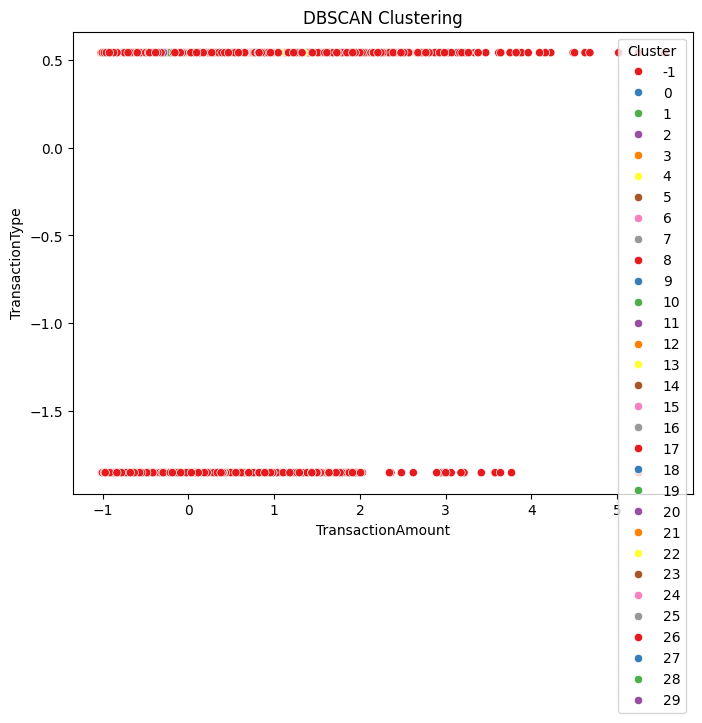

Cluster_DBSCAN
-1     2338
 10       8
 9        8
 12       8
 23       7
 11       7
 2        7
 22       7
 17       6
 29       6
 16       6
 5        6
 1        6
 3        6
 4        6
 8        5
 7        5
 6        5
 15       5
 19       5
 0        5
 27       5
 13       5
 25       5
 21       5
 26       5
 14       5
 18       5
 20       5
 24       5
 28       5
Name: count, dtype: int64


In [16]:
#DB-Scasn clustering

# Memilih kolom numerik dan normalisasi
numerical_columns = df.select_dtypes(exclude=['object']).columns.tolist()
X = df[numerical_columns]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Menjalankan DBSCAN
dbscan = DBSCAN(eps=1.5, min_samples=5)  # Parameter eps dan min_samples dapat disesuaikan
df['Cluster_DBSCAN'] = dbscan.fit_predict(X_scaled)

# Visualisasi hasil clustering
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=df['Cluster_DBSCAN'], palette="Set1")
plt.xlabel(numerical_columns[0])
plt.ylabel(numerical_columns[1])
plt.title("DBSCAN Clustering")
plt.legend(title="Cluster")
plt.show()

# Distribusi cluster
print(df['Cluster_DBSCAN'].value_counts())

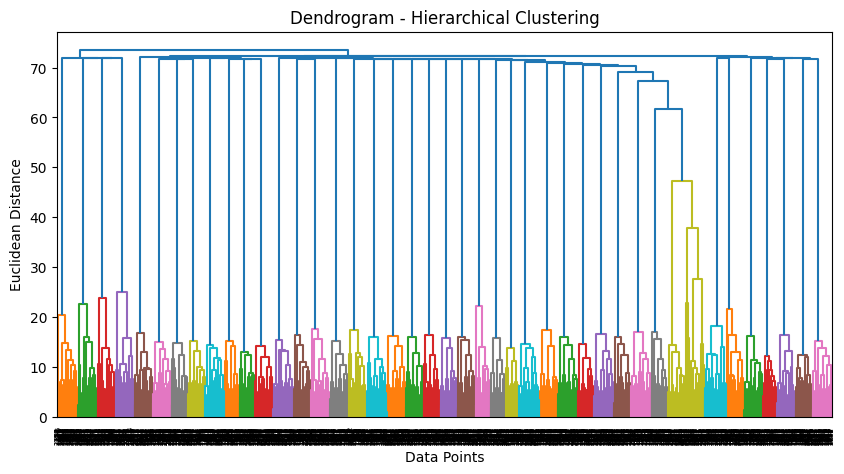

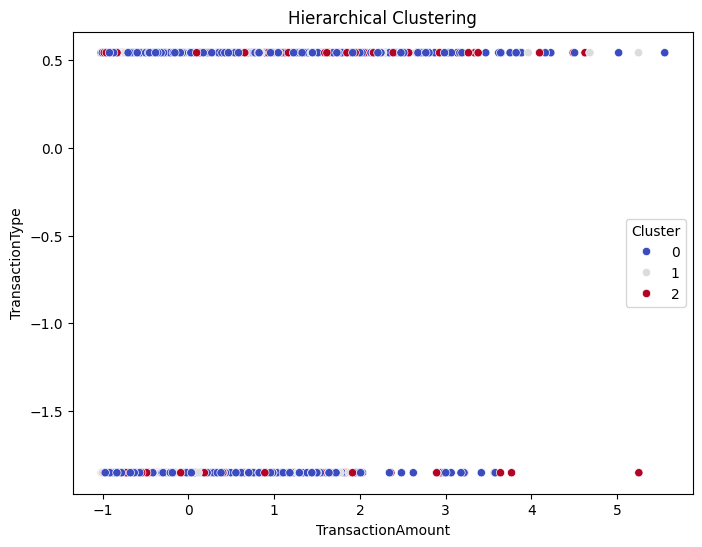

Cluster_Hierarchical
0    1811
2     449
1     252
Name: count, dtype: int64


In [17]:
# Memilih kolom numerik dan normalisasi
numerical_columns = df.select_dtypes(exclude=['object']).columns.tolist()
X = df[numerical_columns]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Menjalankan Hierarchical Clustering
optimal_k = 3  # Tentukan jumlah cluster
hierarchical = AgglomerativeClustering(n_clusters=optimal_k)
df['Cluster_Hierarchical'] = hierarchical.fit_predict(X_scaled)

# Plot Dendrogram
plt.figure(figsize=(10, 5))
linkage_matrix = linkage(X_scaled, method='ward')
dendrogram(linkage_matrix)
plt.title("Dendrogram - Hierarchical Clustering")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

# Visualisasi hasil clustering
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=df['Cluster_Hierarchical'], palette="coolwarm")
plt.xlabel(numerical_columns[0])
plt.ylabel(numerical_columns[1])
plt.title("Hierarchical Clustering")
plt.legend(title="Cluster")
plt.show()

# Distribusi cluster
print(df['Cluster_Hierarchical'].value_counts())

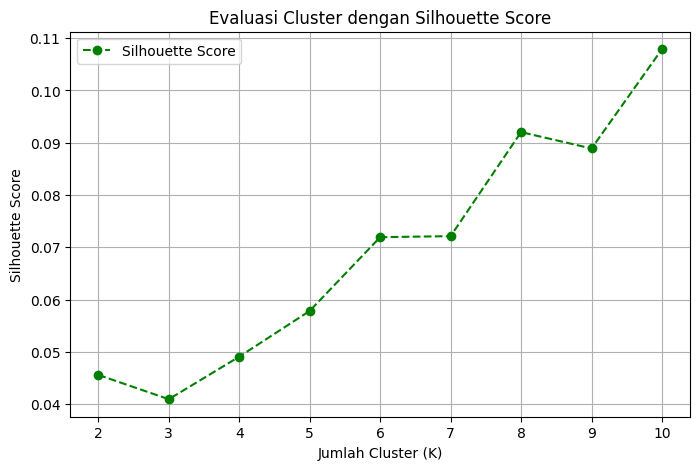

In [18]:
# Normalisasi dataset sebelum clustering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[numerical_columns])  # Gunakan dataset yang telah diproses

# Menyimpan nilai silhouette untuk berbagai jumlah cluster (K)
silhouette_scores = []
K_range = range(2, 11)  # Mulai dari 2 karena silhouette tidak valid untuk K=1

for k in K_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, cluster_labels)
    silhouette_scores.append(score)

# Plot Silhouette Score
plt.figure(figsize=(8, 5))
plt.plot(K_range, silhouette_scores, marker='o', linestyle='--', color='g', label="Silhouette Score")
plt.xlabel("Jumlah Cluster (K)")
plt.ylabel("Silhouette Score")
plt.title("Evaluasi Cluster dengan Silhouette Score")
plt.xticks(K_range)
plt.legend()
plt.grid(True)
plt.show()

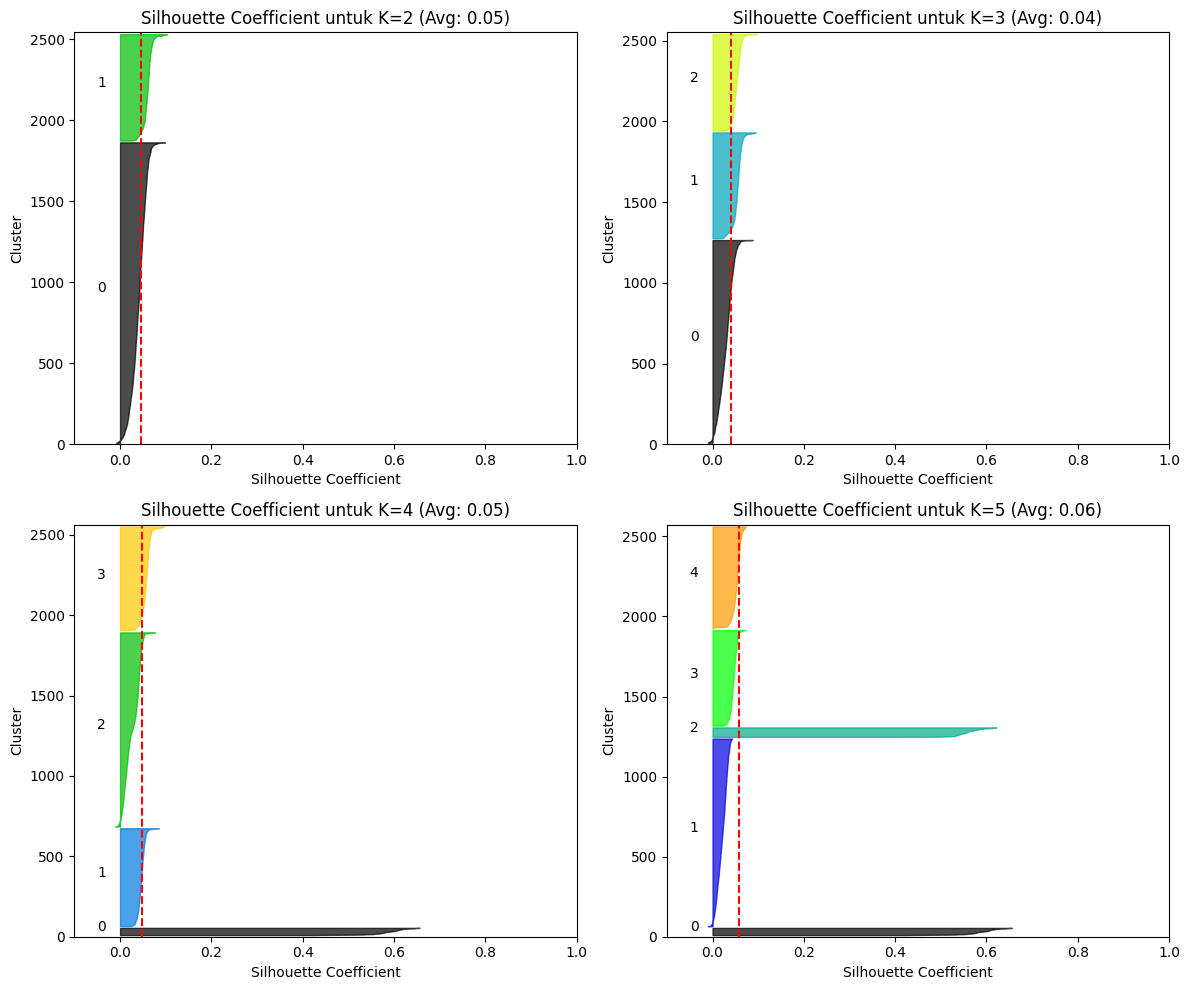

In [19]:
# Normalisasi dataset
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[numerical_columns])  # Gunakan dataset yang sudah dibersihkan

K_range = range(2, 6)  # Pilih rentang K yang lebih masuk akal
fig, axes = plt.subplots(2, 2, figsize=(12, 10))  # Subplot 2x2 untuk 4 nilai K
axes = axes.flatten()

for idx, k in enumerate(K_range):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(X_scaled)

    # Hitung Silhouette Coefficient untuk setiap data point
    silhouette_values = silhouette_samples(X_scaled, cluster_labels)
    avg_score = silhouette_score(X_scaled, cluster_labels)

    y_lower = 10
    axes[idx].set_xlim([-0.1, 1])
    axes[idx].set_ylim([0, len(X_scaled) + (k + 1) * 10])
    axes[idx].set_title(f"Silhouette Coefficient untuk K={k} (Avg: {avg_score:.2f})")
    axes[idx].set_xlabel("Silhouette Coefficient")
    axes[idx].set_ylabel("Cluster")

    for i in range(k):
        ith_cluster_silhouette_values = silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / k)
        axes[idx].fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )
        
        axes[idx].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10

    axes[idx].axvline(x=avg_score, color="red", linestyle="--")

plt.tight_layout()
plt.show()

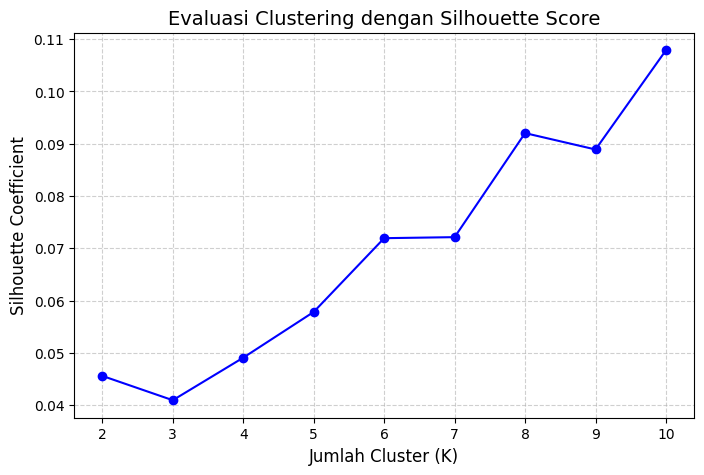

In [20]:
# Normalisasi dataset sebelum clustering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[numerical_columns])  # Pastikan menggunakan dataset yang bersih

# Menyimpan nilai silhouette untuk setiap jumlah cluster
silhouette_vals = []
cluster_range = range(2, 11)  # Uji jumlah cluster dari 2 hingga 10

for k in cluster_range:
    model = KMeans(n_clusters=k, random_state=42, n_init=10)  # Gunakan n_init untuk stabilitas
    labels = model.fit_predict(X_scaled)  # Dapatkan label cluster
    score = silhouette_score(X_scaled, labels)  # Hitung silhouette score
    silhouette_vals.append(score)  # Simpan hasil

# Visualisasi hasil silhouette score
plt.figure(figsize=(8, 5))
plt.plot(cluster_range, silhouette_vals, linestyle='-', marker='o', color='b', markersize=6)
plt.xlabel('Jumlah Cluster (K)', fontsize=12)
plt.ylabel('Silhouette Coefficient', fontsize=12)
plt.title('Evaluasi Clustering dengan Silhouette Score', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)

plt.show()

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

In [21]:
#Type your code here

## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [22]:
#Type your code here

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

In [23]:
#Type your code here

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [24]:
# Type your code here


### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [25]:
# Type your code here

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [26]:
# Type your code here

Tulis hasil interpretasinya di sini.
1. Cluster 1:
2. Cluster 2:
3. Cluster 3:

# Contoh interpretasi [TEMPLATE]
# Analisis Karakteristik Cluster dari Model KMeans

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

## Cluster 1:
- **Rata-rata Annual Income (k$):** 48,260  
- **Rata-rata Spending Score (1-100):** 56.48  
- **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan menengah dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang moderat dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka.

## Cluster 2:
- **Rata-rata Annual Income (k$):** 86,540  
- **Rata-rata Spending Score (1-100):** 82.13  
- **Analisis:** Cluster ini menunjukkan pelanggan dengan pendapatan tahunan tinggi dan pengeluaran yang sangat tinggi. Pelanggan di cluster ini merupakan kelompok premium dengan daya beli yang kuat dan cenderung mengeluarkan uang dalam jumlah besar untuk produk atau layanan.

## Cluster 3:
- **Rata-rata Annual Income (k$):** 87,000  
- **Rata-rata Spending Score (1-100):** 18.63  
- **Analisis:** Cluster ini terdiri dari pelanggan dengan pendapatan tahunan yang tinggi tetapi pengeluaran yang rendah. Mereka mungkin memiliki kapasitas finansial yang baik namun tidak terlalu aktif dalam berbelanja. Ini bisa menunjukkan bahwa mereka lebih selektif dalam pengeluaran mereka atau mungkin lebih cenderung untuk menyimpan uang.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.